# Convolutional Neural Network (CNN) in Deep Learning

- Convolutional Neural Network (CNN) is the types of Neural Network used used for image classification.
- CNN is used for image classification, object detection, image segmentation, image generation, and image restoration
- CNN is used in self-driving cars, medical imaging, and surveillance systems.
- CNN is used in image classification, object detection, image segmentation, image generation, and image restoration
- CNN is used in self-driving cars, medical imaging, and surveillance systems.

## Methods behind the Convolutional Neural Network:
1. **Convolutional Layer**: This is the first layer in the network. It takes the
input image and applies a set of learnable filters to it. Each filter scans the
image in both horizontal and vertical directions, performing a dot product at each
location. The output of this operation is a feature map, which represents the
presence of a feature at a particular location in the image.
2. **Activation Function**: After the convolutional layer, an activation function is
applied to the feature map. The most commonly used activation function in CNNs is
the ReLU (Rectified Linear Unit) function. It maps all negative values to 0 and
all positive values to the same value. This helps in introducing non-linearity in
the model and prevents the model from dying due to the vanishing gradient problem.
3. **Pooling Layer**: After the convolutional and activation layers, a pooling layer
is applied. The pooling layer reduces the spatial dimensions of the feature map by
taking the maximum or average value across a region. This helps in reducing the
number of parameters and the computational cost of the model.
4. **Flatten Layer**: After the pooling layer, the feature map is flattened into a
one-dimensional array. This is done to prepare the data for the fully connected
layers.
5. **Fully Connected Layers**: The flattened feature map is then passed through one
or more fully connected layers. These layers are also known as dense layers. They
take the input from the previous layer and produce an output based on the
weights and biases of the layer.
6. **Output Layer**: The final layer in the network is the output layer. It takes
the input from the previous layer and produces the final output of the network.

# A complete Convolutional Neural Network (CNN) Model with Image Classification

**Import the libraries**

In [56]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

**Import the dataset**

In [57]:
#Import the dataset:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

**Plot the Numbers dataset**

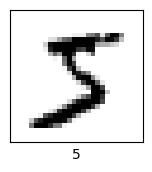

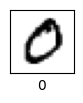

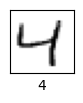

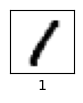

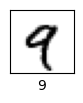

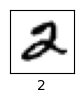

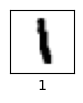

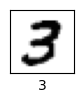

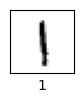

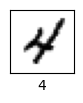

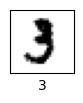

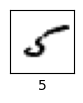

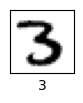

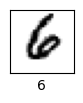

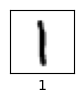

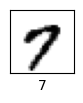

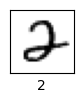

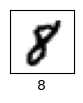

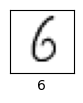

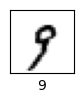

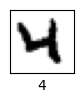

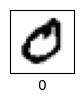

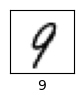

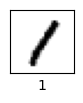

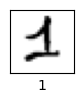

In [58]:
#Display the some sample images:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    plt.show()

**Check the Length of dataset with pixels**

In [59]:
#Print the length of dataset:
print(f"Number of training dataset {len(X_train)} and test dataset {len(X_test)}.")

Number of training dataset 60000 and test dataset 10000.


In [60]:
#Shape of dataset:
print(f"Number of pexels in dataset {X_train[0].shape}.")

Number of pexels in dataset (28, 28).


In [61]:
#Check the dataset:
X_train.shape

(60000, 28, 28)

In [62]:
#Shape of y label:
y_train.shape

(60000,)

In [63]:
#Split the dataset:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Show the dataset**

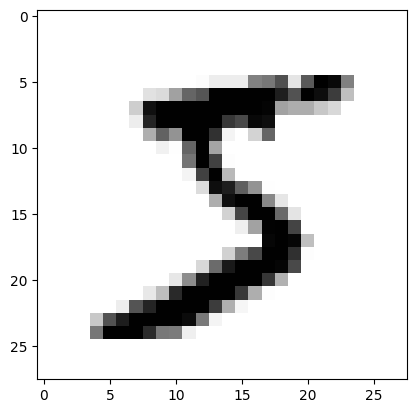

In [64]:
#Plot the dataset with pexel image:
plt.imshow(X_train[0], cmap=plt.cm.binary)

**Show the Image into Gray scale**

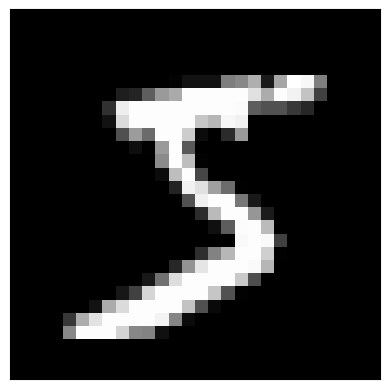

In [65]:
#Change the into gray scale:
plt.imshow(X_train[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

**Number of Pixels into the dataset**

In [66]:
#Print the Pixel values:
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print(f"{pixel:3}", end=" ")
    print()    

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

**Normalized the Pixels**

In [67]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [68]:
#Print the Pixel values:
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print(f"{pixel:0.3}", end=" ")
    print()    

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0706 0.0706 0.0706 0.494 0.533 0.686 0.102 0.651 1.0 0.969 0.498 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.118 0.141 0.369 0.604 0.667 0.992 0.992 0.992 0.992 0.992 0.882 0.675 0.992 0.949 0.765 0.251 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.192 0.933 0.992 0.992 0.992 0.992 0.992 0.992 0.992 0.992 0.984 0.365 0.322 0.322 0.22 0.153 0.0 0.0 0.0 0.

**Normalized Graph**

<Figure size 640x480 with 0 Axes>

<Axes: >

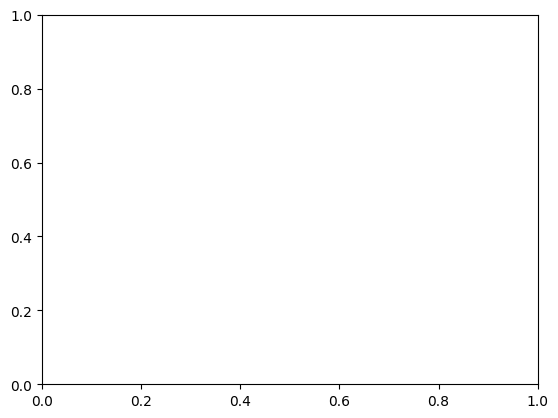

In [69]:
#Replace the images into the channel dimensions :
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
display(plt.gcf())
display(plt.gca())

## Convolutional Neural Network (CNN) Model

In [71]:
#Built the Model:
from tensorflow.keras import layers
#Create the input layer:
input_layer = layers.Input(shape=(28,28,1))
#Create the CNN Model:
model = tf.keras.Sequential([
    input_layer,
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

**Summary of the Model**

In [72]:
#Model summary:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the Model**

In [76]:
#Compile the model:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

**Fit the Model**

In [78]:
#Fit the model:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9717 - loss: 0.0934 - val_accuracy: 0.9789 - val_loss: 0.0710
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9817 - val_loss: 0.0630
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9789 - loss: 0.0671 - val_accuracy: 0.9800 - val_loss: 0.0620
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9824 - val_loss: 0.0581
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.9846 - loss: 0.0529 - val_accuracy: 0.9819 - val_loss: 0.0589


**Evaluate the Model**

In [81]:
#Evaluate the model:
test_loss, test_acc = model.evaluate(X_test, y_test)
#Print the evaluation metrics
print(f"The value of loss function: {test_loss}.")
print(f"The value of accuracy: {test_acc}.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0548
The value of loss function: 0.04763807728886604.
The value of accuracy: 0.9847000241279602.


In [ ]:
#Fit the model:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9717 - loss: 0.0934 - val_accuracy: 0.9789 - val_loss: 0.0710
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9817 - val_loss: 0.0630
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9789 - loss: 0.0671 - val_accuracy: 0.9800 - val_loss: 0.0620
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9824 - val_loss: 0.0581
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - accuracy: 0.9846 - loss: 0.0529 - val_accuracy: 0.9819 - val_loss: 0.0589


**Saved the Model**

In [84]:
#Save the model:
model.save('models_save/model.h5')
#Ignore the warnings:
import warnings
warnings.filterwarnings("ignore")

**Reshape the img Pixels**

In [86]:
#Print the Feature test image:
img = X_test[0]
print(img.shape)

(28, 28, 1)


In [89]:
#Reshape the Image Pixels:
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28, 1)


**Plot the Reshape Image**

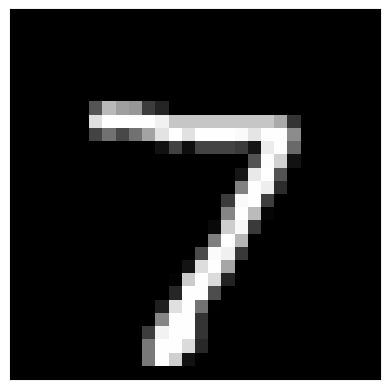

In [90]:
#Plot the Reshape Image:
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

**Predict the Model Image and Values**

In [93]:
#Predict the Image:
pred = model.predict(img.reshape(1, 28, 28, 1))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[3.53337327e-07 7.87904071e-07 3.16801220e-06 1.58409937e-04
  1.65941552e-10 2.72347283e-08 1.88849079e-14 9.99825299e-01
  5.07812103e-08 1.19136475e-05]]


In [96]:
#Print the number accuracy:
print(pred[:, 7])


[0.9998253]


In [95]:
#Print the number:
print(f'{pred.argmax()}.')

7.
